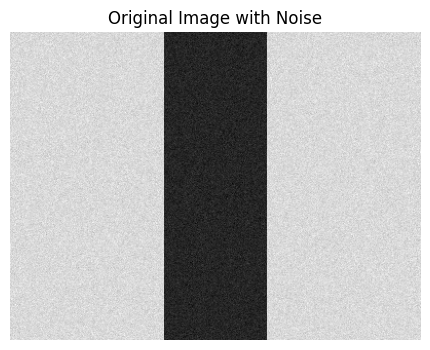

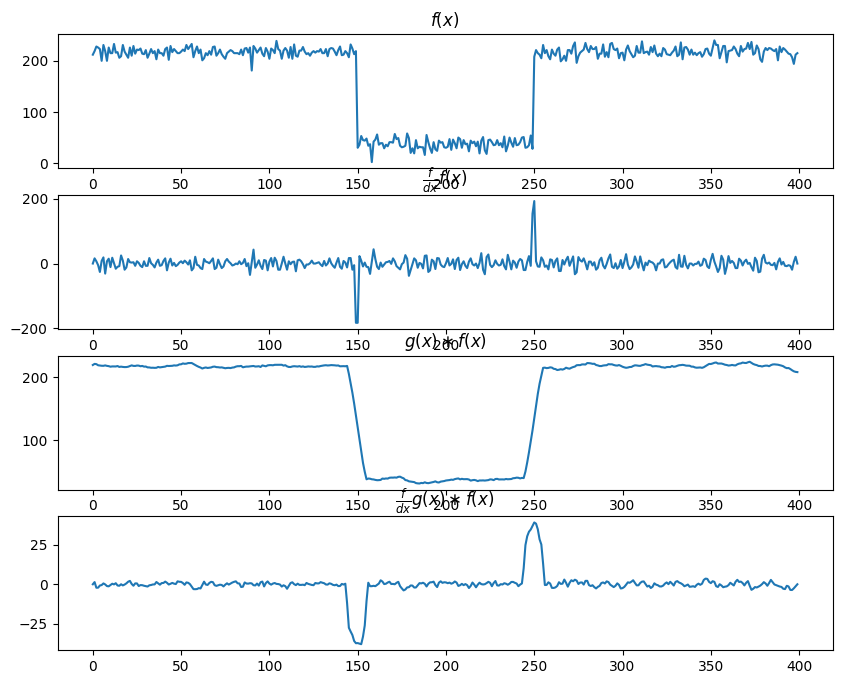

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

im = np.ones((300, 400), dtype=np.uint8) * 255
im[:, 150:250] = 0

mean = 0
sigma = 0.05
noise = np.random.normal(mean, sigma, im.shape).astype(np.float32)
im = im.astype(np.float32) / 255.0

im = cv.add(im, noise)*255.0
im = cv.normalize(im, None, 0, 255, cv.NORM_MINMAX).astype(np.uint8)

f = im[150,:] # selecting one horizontal line of the noisy image
kernal = np.array([-1, 0, 1])
fx = cv.filter2D(f, cv.CV_32F, kernal)

g = cv.getGaussianKernel(11, 5., cv.CV_64F)
fgf = cv.filter2D(f, cv.CV_32F, g)
fgfx = cv.filter2D(fgf, cv.CV_32F, kernal)

# cv.namedWindow("Image", cv.WINDOW_AUTOSIZE)
# cv.imshow("Image", im)
# cv.waitKey(0)
# cv.destroyAllWindows()

plt.figure(figsize=(6, 4))
plt.imshow(im, cmap='gray')
plt.title("Original Image with Noise")
plt.axis('off')
plt.show()

fig, ax = plt.subplots(4, figsize=(10, 8))
ax[0].plot(f)
ax[0].set_title("$f(x)$")
ax[1].plot(fx)
ax[1].set_title("$ \\frac{f}{dx}f(x)$")
ax[2].plot(fgf)
ax[2].set_title("$g(x) \\ast f(x)$")
ax[3].plot(fgfx)
ax[3].set_title("$ \\frac{f}{dx}g(x) \\ast f(x)$")
plt.show()



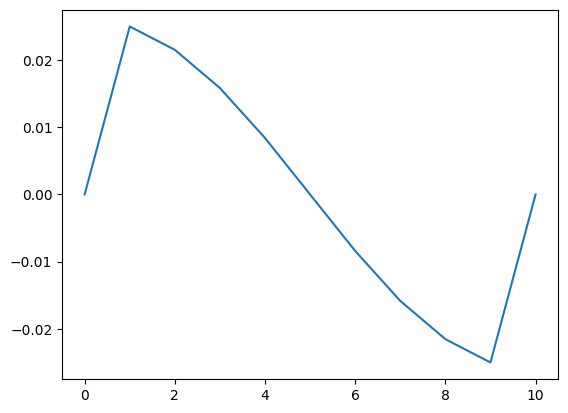

In [17]:
gx = cv.filter2D(g, -1, kernal, cv.BORDER_CONSTANT)
plt.plot(gx)

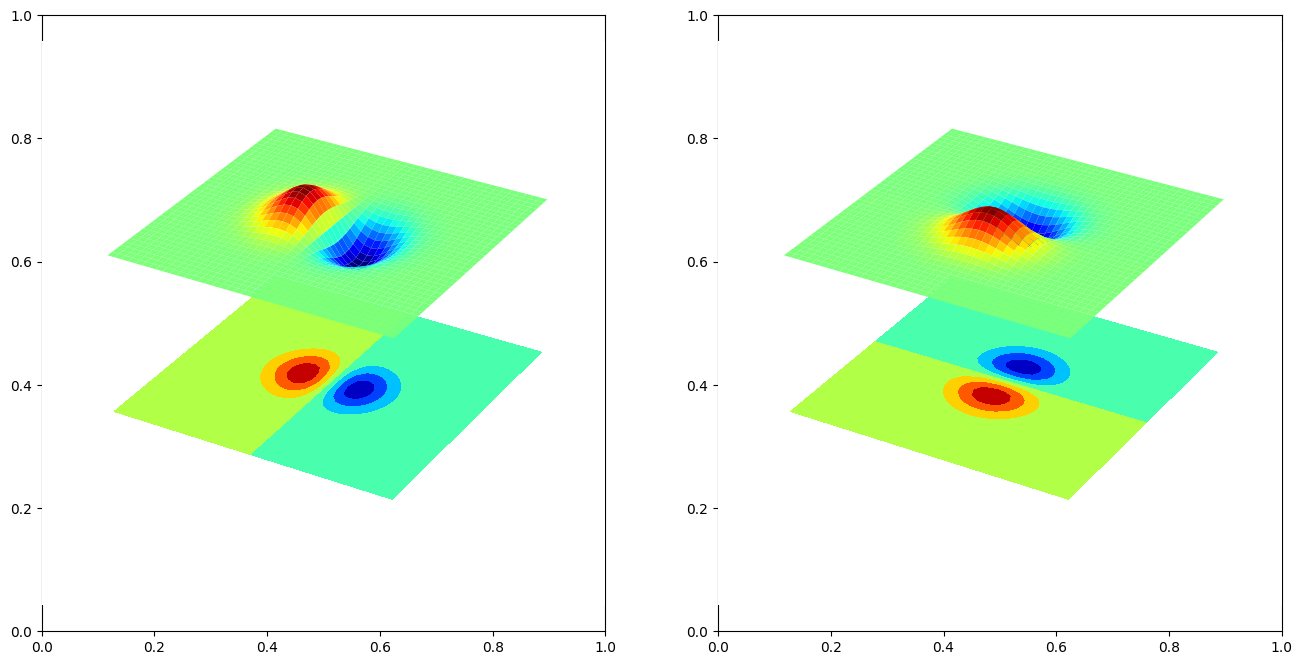

In [1]:
import cv2 as cv
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np
from matplotlib.ticker import LinearLocator, FormatStrFormatter

fig, ax = plt.subplots(1,2, figsize=(16,8))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')
sigma = 1

X = np.arange(-5, 5.25, 0.25)
Y = np.arange(-5, 5.25, 0.25)
X, Y = np.meshgrid(X, Y)
Z = np.exp(-(X**2 + Y**2) / (2*sigma**2))
kernel = np.array([[0,0,0], [-1,0,1],[0,0,0]],dtype=np.float32)
Zx = cv.filter2D(Z, -1, kernel)
kernel = np.array([[0,-1,0], [0,0,0],[0,1,0]],dtype=np.float32)
Zy = cv.filter2D(Z, -1, kernel)

surf1 = ax1.plot_surface(X, Y, Zx, cmap=cm.jet, linewidth=0, antialiased=True)
surf2 = ax2.plot_surface(X, Y, Zy, cmap=cm.jet, linewidth=0, antialiased=True)

ax1.zaxis.set_major_locator(LinearLocator(10))
ax1.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax2.zaxis.set_major_locator(LinearLocator(10))
ax2.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

cset = ax1.contourf(X, Y,Zx, zdir='z', offset=np.min(Z) -1.5, cmap=cm.jet)
ax1.set_zlim(np.min(Z) -2, np.max(Zx))
cset = ax2.contourf(X, Y,Zy, zdir='z', offset=np.min(Z) -1.5, cmap=cm.jet)
ax2.set_zlim(np.min(Z) -2, np.max(Zy))

ax1.axis('off')
ax2.axis('off')
plt.show()